## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
!nvidia-smi

Tue Mar 28 04:42:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT_PATH = '/content/drive/MyDrive/VggNEt'

# New Section

# New Section

In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/VggNEt'

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'flowers/train'
valid_path = 'flowers/validation'


In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
  print(layer)

In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
  # useful for getting number of output classes
folders = glob('flowers/train/*')

In [ ]:
folders

['flowers/train/daisy',
 'flowers/train/dandelion',
 'flowers/train/rose',
 'flowers/train/sunflower',
 'flowers/train/tulip']

In [ ]:
len(folders)

5

In [ ]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
!pwd

/content/drive/MyDrive/VggNEt


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('flowers/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
19/19 [==============================] - 159s 8s/step - loss: 3.0089 - accuracy: 0.3817 - val_loss: 1.2181 - val_accuracy: 0.5800
Epoch 2/10
19/19 [==============================] - 13s 683ms/step - loss: 0.7506 - accuracy: 0.7250 - val_loss: 0.8660 - val_accuracy: 0.7167
Epoch 3/10
19/19 [==============================] - 14s 765ms/step - loss: 0.4927 - accuracy: 0.8333 - val_loss: 0.8180 - val_accuracy: 0.7433
Epoch 4/10
19/19 [==============================] - 13s 672ms/step - loss: 0.3272 - accuracy: 0.9000 - val_loss: 0.7422 - val_accuracy: 0.7600
Epoch 5/10
19/19 [==============================] - 13s 678ms/step - loss: 0.2658 - accuracy: 0.9083 - val_loss: 0.7348 - val_accuracy: 0.7533
Epoch 6/10
19/19 [==============================] - 13s 685ms/step - loss: 0.2023 - accuracy: 0.9500 - val_loss: 0.8165 - val_accuracy: 0.7633
Epoch 7/10
19/19 [==============================] - 12s 659ms/step - loss: 0.1505 - accuracy: 0.9700 - val_loss: 0.8404 - val_accuracy: 0.7433
E

In [ ]:
import matplotlib.pyplot as plt

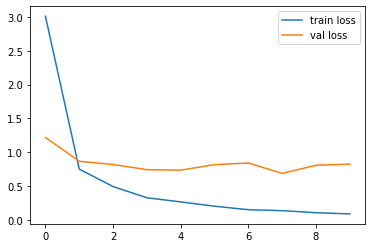

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

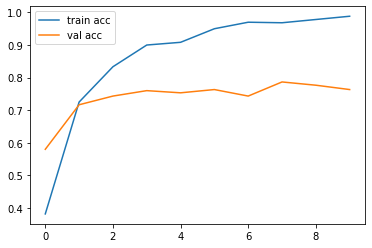

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
y_pred = model.predict(test_set)

10/10 [==============================] - 3s 260ms/step


In [ ]:
y_pred

array([[2.9083315e-01, 5.2650604e-02, 3.8482856e-02, 5.8587462e-01,
        3.2158729e-02],
       [2.2324188e-02, 2.6481031e-05, 5.2868878e-03, 1.2624444e-03,
        9.7109997e-01],
       [3.0716700e-03, 5.4579868e-05, 7.2202474e-02, 3.3075389e-01,
        5.9391731e-01],
       ...,
       [1.2634632e-02, 4.0251918e-05, 9.0989739e-01, 6.6354480e-03,
        7.0792273e-02],
       [3.7586153e-04, 5.4169291e-06, 9.7916198e-01, 3.6646682e-03,
        1.6792081e-02],
       [3.4715895e-02, 3.7883625e-03, 2.0079222e-02, 3.0392513e-02,
        9.1102403e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 4, 4, 0, 0, 1, 0, 3, 4, 3, 2, 0, 2, 1, 0, 4, 0, 4, 4, 3, 0, 0,
       0, 2, 4, 3, 2, 0, 0, 3, 3, 1, 0, 1, 1, 0, 2, 2, 4, 2, 4, 1, 3, 0,
       2, 2, 4, 4, 1, 2, 3, 1, 4, 0, 2, 1, 4, 1, 4, 0, 4, 4, 4, 4, 2, 3,
       1, 1, 3, 1, 4, 1, 2, 4, 0, 4, 3, 1, 0, 0, 2, 0, 4, 2, 4, 2, 1, 1,
       0, 1, 1, 2, 4, 0, 2, 2, 3, 2, 4, 3, 4, 1, 0, 2, 2, 2, 0, 2, 0, 4,
       2, 2, 3, 0, 4, 0, 0, 0, 4, 2, 0, 0, 4, 4, 4, 3, 0, 1, 1, 3, 4, 4,
       0, 0, 4, 4, 2, 2, 0, 1, 2, 0, 0, 3, 0, 0, 0, 4, 3, 2, 1, 0, 0, 2,
       4, 3, 0, 3, 2, 4, 3, 2, 3, 0, 1, 2, 2, 1, 2, 2, 0, 0, 4, 0, 2, 2,
       2, 2, 2, 1, 1, 3, 1, 2, 2, 0, 4, 1, 0, 3, 4, 2, 4, 3, 0, 2, 4, 0,
       2, 2, 3, 2, 2, 4, 3, 0, 4, 0, 2, 2, 4, 2, 4, 4, 0, 4, 4, 0, 0, 4,
       1, 0, 3, 0, 0, 4, 1, 1, 2, 4, 2, 4, 2, 1, 0, 1, 4, 2, 2, 3, 4, 3,
       2, 0, 2, 4, 0, 1, 0, 4, 1, 3, 4, 4, 0, 1, 2, 4, 4, 4, 2, 3, 4, 0,
       3, 2, 1, 0, 3, 2, 0, 0, 2, 2, 0, 0, 2, 3, 2, 0, 2, 2, 0, 1, 0, 2,
       4, 3, 0, 2, 3, 4, 2, 1, 1, 2, 1, 2, 2, 4])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg16.h5')

In [ ]:
img=image.load_img('tulip.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[215.,  87.,  12.],
        [221., 108.,  14.],
        [224., 116.,  15.],
        ...,
        [102.,  22.,  15.],
        [103.,  22.,  18.],
        [114.,  20.,  20.]],

       [[219.,  83.,  21.],
        [219.,  98.,  17.],
        [223., 108.,  19.],
        ...,
        [102.,  18.,  16.],
        [100.,  19.,  16.],
        [107.,  17.,  19.]],

       [[219.,  73.,  26.],
        [224.,  93.,  25.],
        [222.,  96.,  20.],
        ...,
        [101.,  15.,  18.],
        [ 98.,  16.,  18.],
        [ 99.,  14.,  17.]],

       ...,

       [[156.,  16.,  19.],
        [153.,  17.,  17.],
        [153.,  15.,  15.],
        ...,
        [ 91.,  17.,  14.],
        [ 89.,  18.,  14.],
        [ 90.,  19.,  15.]],

       [[158.,  15.,  19.],
        [155.,  17.,  17.],
        [153.,  15.,  15.],
        ...,
        [ 86.,  17.,  12.],
        [ 86.,  17.,  10.],
        [ 90.,  21.,  14.]],

       [[159.,  14.,  19.],
        [156.,  18.,  18.],
        [154.,  

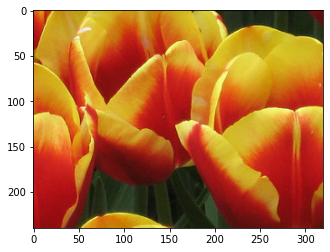

In [ ]:
Z = plt.imread('tulip.jpg')
plt.imshow(Z)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 1s 826ms/step


array([[6.02148890e-01, 2.40572423e-01, 4.67955954e-02, 1.10459946e-01,
        2.31866507e-05]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 36ms/step


In [ ]:
a

array([0])

In [ ]:
flower_name = ['dandelion',
 'sunflower',
 'tulip',
 'daisy',
 'rose']

In [ ]:
flower_name[a[0]]

'dandelion'